In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np


In [3]:

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


In [38]:

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [39]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [40]:
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
        
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 198.3993377685547
epoch 2, loss 16.187885284423828
epoch 3, loss 1.3254139423370361
epoch 4, loss 0.11307360231876373
epoch 5, loss 0.01413132343441248
epoch 6, loss 0.006006197072565556
epoch 7, loss 0.005289250519126654
epoch 8, loss 0.005177152808755636
epoch 9, loss 0.005115052219480276
epoch 10, loss 0.005057540722191334
epoch 11, loss 0.005001050885766745
epoch 12, loss 0.004945192486047745
epoch 13, loss 0.004889948293566704
epoch 14, loss 0.0048353420570492744
epoch 15, loss 0.004781366791576147
epoch 16, loss 0.00472798477858305
epoch 17, loss 0.004675151314586401
epoch 18, loss 0.004622954875230789
epoch 19, loss 0.004571341909468174
epoch 20, loss 0.004520316608250141
epoch 21, loss 0.004469841718673706
epoch 22, loss 0.004419897682964802
epoch 23, loss 0.004370545968413353
epoch 24, loss 0.004321733023971319
epoch 25, loss 0.004273473750799894
epoch 26, loss 0.004225767217576504
epoch 27, loss 0.004178569186478853
epoch 28, loss 0.004131919704377651
epoch 29, 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [37]:
print(loss)

tensor(0.0909, grad_fn=<MseLossBackward>)


In [16]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.4390395],
       [ 2.5198228],
       [ 4.6006064],
       [ 6.68139  ],
       [ 8.762173 ],
       [10.842957 ],
       [12.923739 ],
       [15.004522 ],
       [17.085306 ],
       [19.16609  ],
       [21.246874 ]], dtype=float32)

In [17]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.clf()

<Figure size 432x288 with 0 Axes>

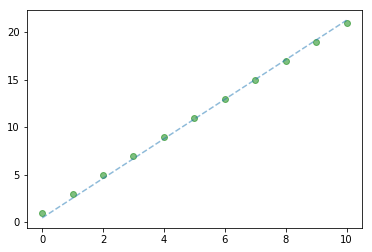

In [27]:
plt.plot(x_train, y_train, 'go', label="True data", alpha=0.5)
plt.plot(x_train, predicted, '--', label="Predictions", alpha=0.5)


### Save model

In [30]:
torch.save(model.state_dict(), 'test1.pkl')

In [31]:
model.load_state_dict(torch.load('test1.pkl'))

In [32]:
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [33]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[2.0808]])),
             ('linear.bias', tensor([0.4390]))])